# ch.5 Regression

### 5.4 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
bostonDF.shape

(506, 14)

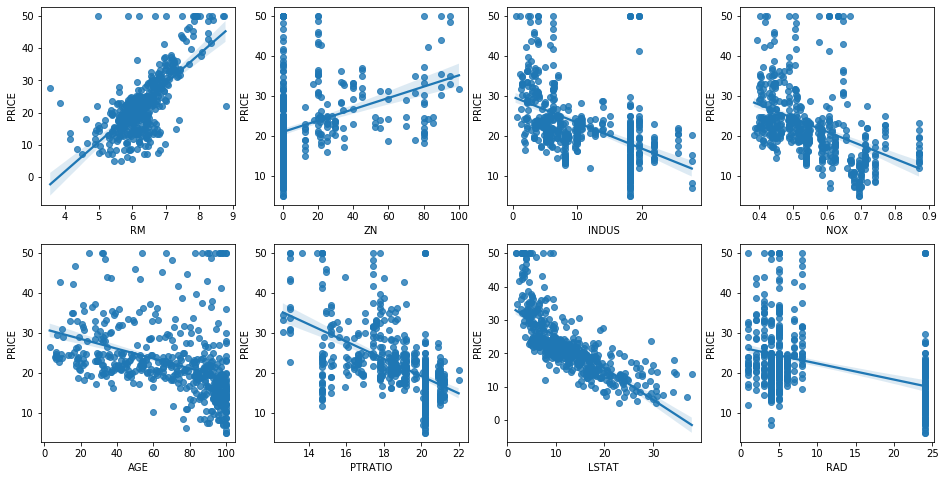

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features) :
    row = int(i/4)
    col = i%4
    # tkqhsdml regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x= feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [7]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [9]:
X = bostonDF['RM']
Y = boston.target

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

- 모델 불러와 객체 생성

In [11]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [12]:
sim_lr.fit(x_train.values.reshape(-1, 1), y_train) 

#x_train이 일차원이라서 values.reshape붙여야함

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 결과 예측하기

In [13]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))

- 결과 확인하기

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4368659674681269

- 계수 w(weight), 절편 b(blas)

In [15]:
sim_lr.coef_, sim_lr.intercept_

(array([8.9555325]), -34.01581780070619)

-  도출한 회귀식 PRICE = 9.99 * RM - 40.09

- 산점도와 회귀선 그리기

In [16]:
# Matplotlib 사용과 한글 처리를 위한 Code

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
mpl.rc('font', family = 'Malgun Gothic')
%matplotlib inline

In [17]:
plt.rcParams["figure.figsize"] = (13,10)
plt.rcParams["font.size"] = 14

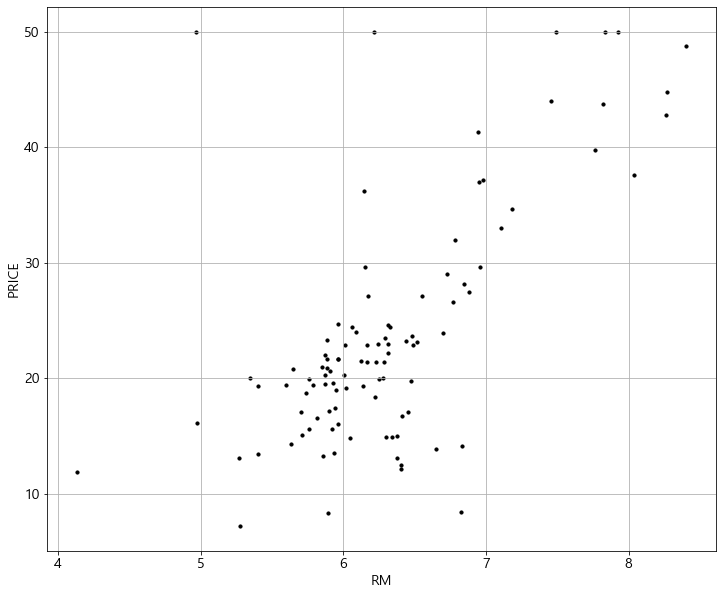

In [18]:
plt.figure(figsize=(12,10))
plt.scatter(x_test, y_test, s=10, c='black')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid()
plt.show()

In [19]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

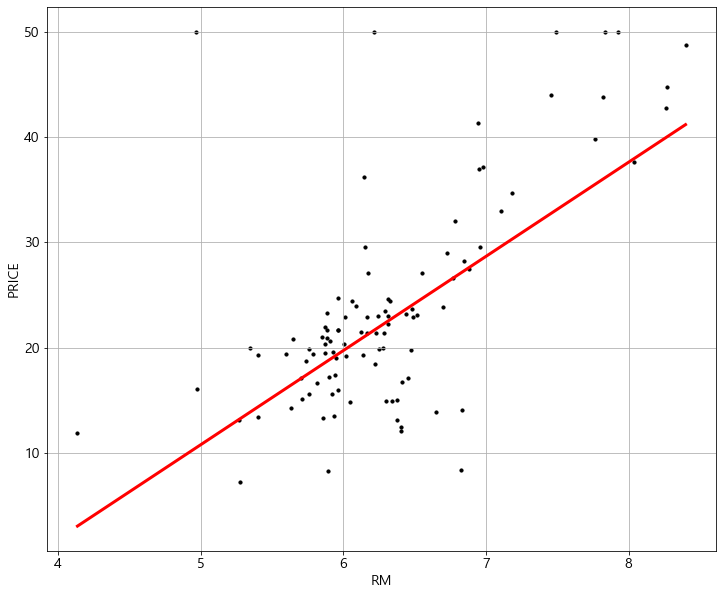

In [20]:
plt.figure(figsize=(12,10))
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid()
plt.show()

In [21]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4, 8])
ys = xs * w + b

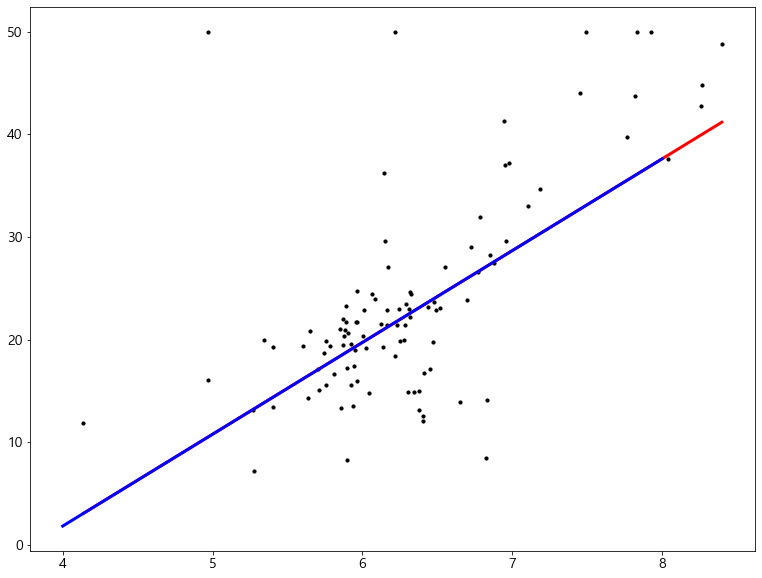

In [22]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs, ys, c='blue', lw=3 )
plt.show()

In [23]:
X = bostonDF['LSTAT']
Y = boston.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

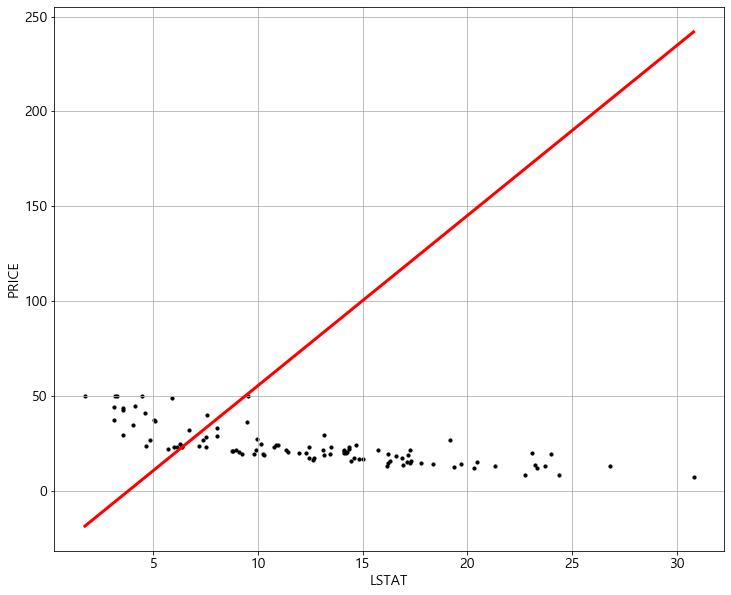

In [24]:
plt.figure(figsize=(12,10))
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.grid()
plt.show()

In [25]:
# 그래프에 한글 표시
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False    # minus 표시
mpl.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 14

In [26]:
from sklearn.metrics import mean_squared_error
def single_regression(x_train, x_test, y_train, y_test) :
    slr = LinearRegression()
    slr.fit(x_train.values.reshape(-1, 1), y_train)
    y_pred = slr.predict(x_test.values.reshape(-1, 1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_

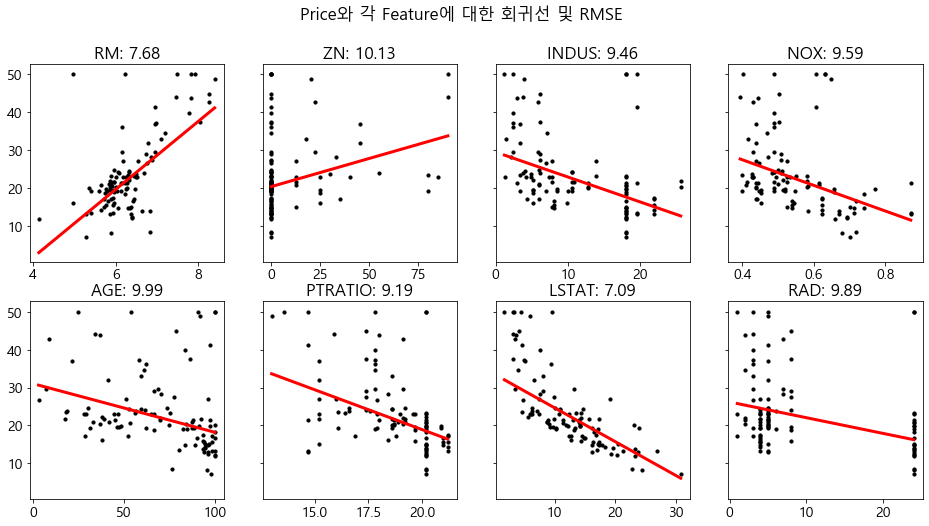

In [27]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2, sharey=True)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for index, feature in enumerate(lm_features):
    X = bostonDF[feature]
    x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2,
                                                        random_state=19)
    rmse, weight, bias = single_regression(x_train, x_test, y_train, y_test)

    row = index // 4
    col = index % 4
    ax = axs[row][col]
    ax.scatter(x_test, y_test, s=10, c='black')
    xline = np.array([np.min(x_test), np.max(x_test)])
    yline = weight * xline + bias
    ax.plot(xline, yline, c='red', lw=3)
    ax.set_title(feature+': '+str(rmse))

fig.suptitle("Price와 각 Feature에 대한 회귀선 및 RMSE")
plt.show()

### Price와 LSTAT의 다양한 회귀 방법에 따른 RMSE 값

In [28]:
x_train, x_test, y_train, y_test = train_test_split(bostonDF['LSTAT'], boston.target, 
                                                        test_size=0.2, random_state=19)

### 1. Linear Regressor

from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [30]:
slr.fit(x_train.values.reshape(-1, 1), y_train)
y_pred = slr.predict(x_test.values.reshape(-1, 1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

### 2. Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5)

In [32]:
dtr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = dtr.predict(x_test.values.reshape(-1,1))
rmse_dtr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

### 3. Support Vector Machine Regressor

In [33]:
from sklearn.svm import SVR
svr = SVR()

In [34]:
svr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = svr.predict(x_test.values.reshape(-1,1))
rmse_svr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

In [35]:
print(rmse_lr, rmse_dtr, rmse_svr)

7.09 6.16 7.03


In [36]:
### 다중 회귀

In [68]:
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.3, random_state = 156)

In [70]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [71]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance scres : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance scres : 0.757


In [72]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [75]:
# 회귀 계수를 큰 값 순으로 정열 하기위해 Series로 생성. 인덱스 칼럼명에 위의

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [76]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


In [77]:
### 5.5 다항 회귀

In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X = bostonDF['LSTAT']   # 차원이 일차원인 것을
pf = poly.fit_transform(X.values.reshape(-1, 1))     # values.reshape으로 이차원화 시킴

In [79]:
pf.shape

(506, 3)

In [83]:
Y = boston.target

x_train, x_test, y_train, y_test = \
train_test_split(X, Y, test_size = 0.2, random_state = 2019)
pf_train = poly.fit_transform(x_train.values.reshape(-1, 1))
pf_test = poly.fit_transform(x_test.values.reshape(-1, 1))

In [84]:
lr = LinearRegression()
lr.fit(pf_train, y_train)
y_pred = lr.predict(pf_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
rmse

5.34

In [85]:
lr.coef_

array([ 0.        , -2.47262189,  0.04716606])

In [86]:
lr.intercept_

44.01462657247066

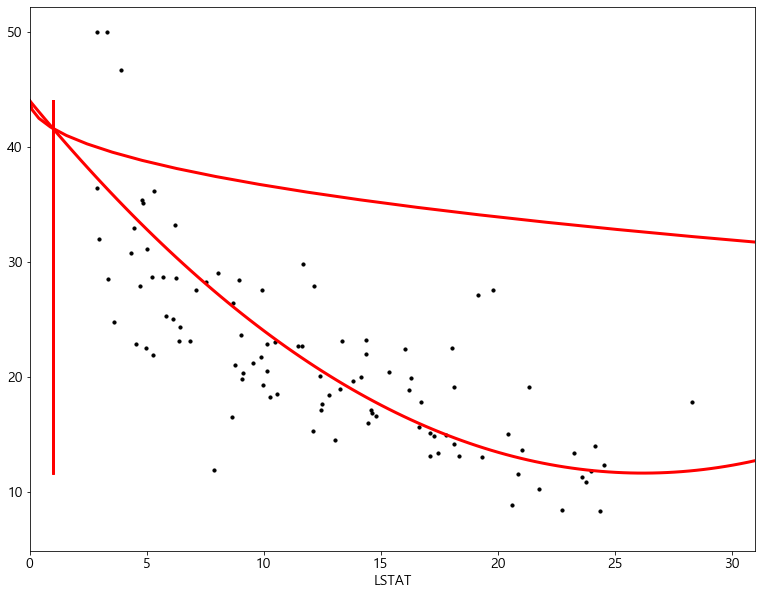

In [91]:
xs = np.linspace(0, 31, 100)
line_x = poly.fit_transform(xs.reshape(-1, 1))
line_y = lr.predict(line_x)
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.xlabel('LSTAT')
plt.xlim(0, 31)
plt.show()

In [92]:
### 5.6 - 규제 선형 모델

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, \
                                 scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 평균 RMSE : 5.518 


In [95]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의함
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 interation하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, x_data, y_target,
                                     scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


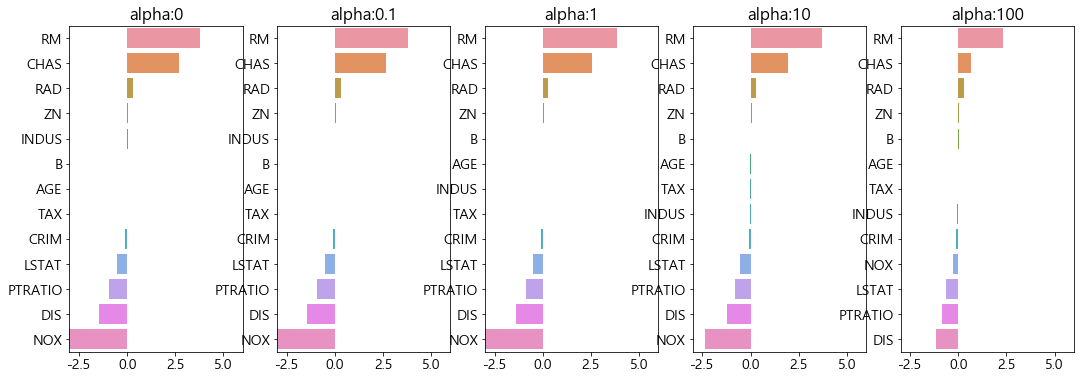

In [96]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [115]:
import numpy as np
import matplotlib.pyplot as plt



def sigmoid(x, w, b):
    return 1 / (1 +np.exp(-(w*x+b)))

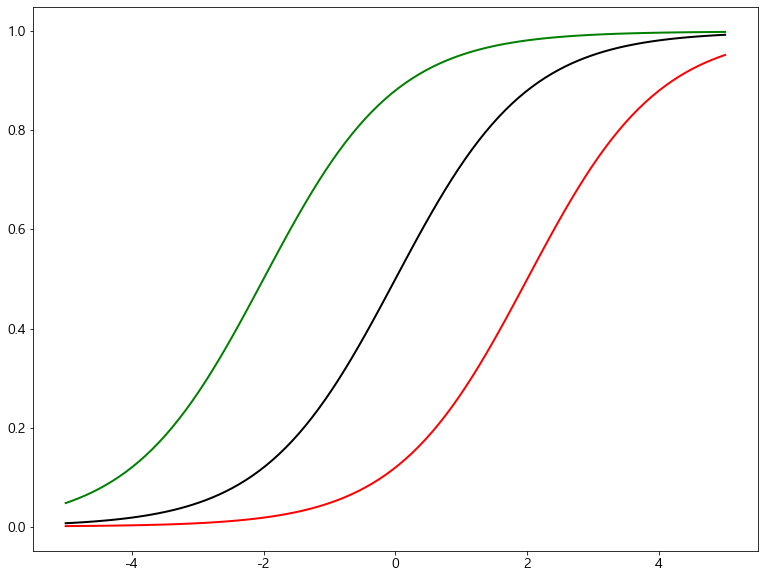

In [117]:


xs = np.linspace(-5, 5, 100)
y0 = sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 1, 2)
y05 = sigmoid(xs, 1, -2)



plt.plot(xs, y0, lw=2, c='k')
plt.plot(xs, y5, lw=2, c='g')
plt.plot(xs, y05, lw=2, c='r')

plt.show()


In [118]:
### 5.7 로지스틱 회귀

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = \
train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)


In [121]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_preds = lr_clf.predict(x_test)

# 정확도와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.977
roc_auc : 0.972


In [122]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


In [ ]:
### 5.8 회귀 트리

In [123]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [126]:
# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores :  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.420 


In [127]:
def get_model_cv_prediction(model, x_data, y_target) :
    neg_mse_scores=cross_val_score(model, x_data, y_target, 
                                   scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
#lgb_reg = LGBMREGRESSOR(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg]
for model in models :
    get_model_cv_prediction(model, x_data, y_target)

#### DecisionTreeRegressor ####
 5 교차 검증의 평균 RMSE : 5.978 
#### RandomForestRegressor ####
 5 교차 검증의 평균 RMSE : 4.420 
#### GradientBoostingRegressor ####
 5 교차 검증의 평균 RMSE : 4.269 
[13:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#### XGBRegressor ####
 5 교차 검증의 평균 RMSE : 4.089 


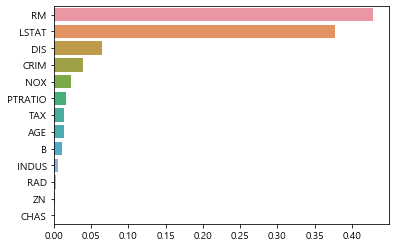

In [132]:
import seaborn as sns
%matplotlib inline

rf_reg =  RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 x_data, y_taret 데이트 세트를 적용해 햑습합니다.
rf_reg.fit(x_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=x_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


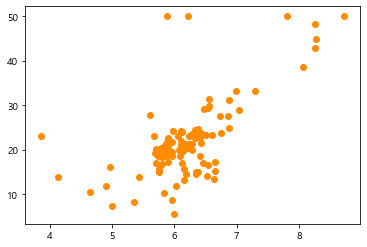

In [134]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [137]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
x_test=np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
x_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(x_feature, y_target)
rf_reg2.fit(x_feature, y_target)
rf_reg7.fit(x_feature, y_target)

pred_lr = lr_reg.predict(x_test)
pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg3.predict(x_test)

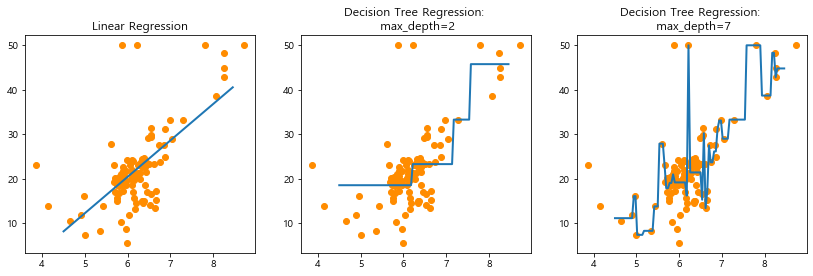

In [138]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(x_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(x_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(x_test, pred_rf7, label="max_depth:7", linewidth=2)